📍 Importing Libraries

In [19]:
!pip install librosa


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sarani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
!pip install tensorflow


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sarani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
!pip install tensorflow scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sarani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [57]:
!pip install keras


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sarani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
# required by librosa for resampling audio
!pip install resampy


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sarani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
#Audio Processing Libraries
import librosa
import librosa.display
from scipy import signal

#For Playing Audios
import IPython.display as ipd

#Array Processing
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Display the confusion matrix
from sklearn.metrics import confusion_matrix

#Deal with .pkl files
import pickle

#Create a dataframe
import pandas as pd

#Transform and encode the categorical targets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Split dataset
from sklearn.model_selection import train_test_split

import os

📍 Exploring Dataset

🚑 Ambulance

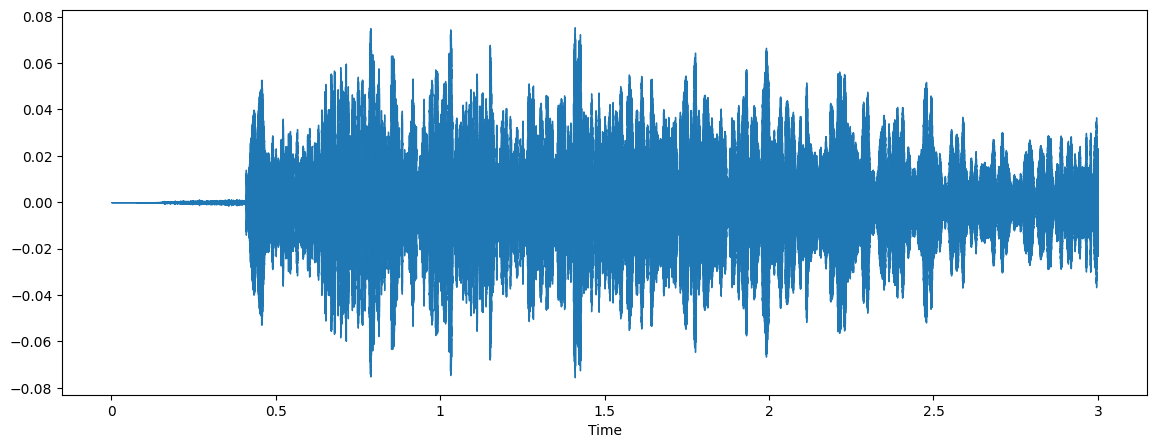

In [23]:
filename = "sounds/ambulance/sound_1.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

🚒 Firetruck

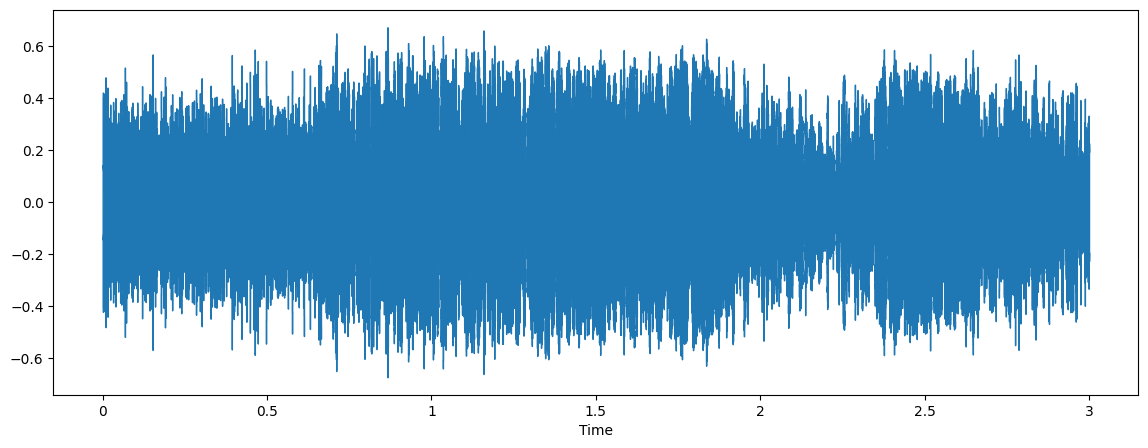

In [24]:
filename = "sounds/firetruck/sound_201.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

🚕 Traffic

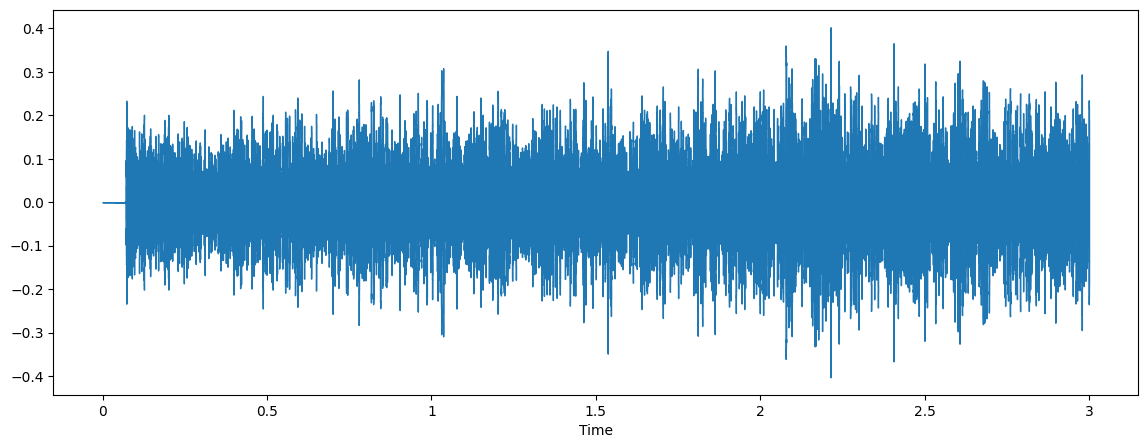

In [25]:
filename = "sounds/traffic/sound_401.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

📍 Data Preprocessing

Using the function features_extractor to get a 80 MFCCs from each audio

In [28]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients

In [29]:
audio_dataset_path = 'sounds/'

extracted_features = []
for path in os.listdir(audio_dataset_path):
    for file in os.listdir(audio_dataset_path+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+path+"/"+file
            data = features_extractor(file_name)  
            extracted_features.append([data, path])

📍 Save the data frame into a .pkl file

In [30]:
f = open('Extracted_Features.pkl', 'wb')
pickle.dump(extracted_features, f)
f.close()

📍 Read the Extracted_Features from the .pkl file

In [31]:
f = open('Extracted_Features.pkl', 'rb')
Data = pickle.load(f)
f.close()

📍 Transform Data into a dataframe

In [32]:
df = pd.DataFrame(Data,columns=['feature','class'])
df.head(-5)

feature      class
0    [-528.137, 94.486534, -45.078938, -14.32153, -...  ambulance
1    [-519.9698, 93.40174, -51.92789, -12.237045, -...  ambulance
2    [-31.674479, 94.35858, -31.012617, -7.9644475,...  ambulance
3    [-113.77173, 105.908325, -31.31386, -8.947266,...  ambulance
4    [-161.36879, 121.79017, -30.598888, -19.370924...  ambulance
..                                                 ...        ...
590  [-145.97641, 173.39388, -11.092016, 13.510363,...    traffic
591  [-167.30963, 186.68607, -19.013657, 10.978311,...    traffic
592  [-178.98862, 191.08702, -21.41564, 6.351011, 1...    traffic
593  [-180.53603, 190.82137, -17.855022, 6.189881, ...    traffic
594  [-178.66907, 185.85397, -19.980267, 5.9193754,...    traffic

[595 rows x 2 columns]

In [33]:
df['class'].value_counts()

class
ambulance    200
firetruck    200
traffic      200
Name: count, dtype: int64

📍 Splitting the data into train and test sets

In [34]:
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

In [35]:
X.shape

(600, 80)

In [36]:
Y.shape

(600,)

📍 Label Encoding

In [40]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [41]:
Y[0]

'ambulance'

In [42]:
y[0]

array([1., 0., 0.])

In [43]:
Y[300]

'firetruck'

In [44]:
y[300]

array([0., 1., 0.])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

📍 Display the shape of each splits

In [47]:
X_train.shape

(480, 80)

In [48]:
X_test.shape

(120, 80)

In [46]:
y_train.shape

(480, 3)

In [49]:
y_test.shape

(120, 3)

📍 Model Building

In [60]:
!!pip install scikeras

['Collecting scikeras',
 '  Downloading scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)',
 'Requirement already satisfied: keras>=3.2.0 in c:\\users\\sarani\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages (from scikeras) (3.5.0)',
 'Requirement already satisfied: scikit-learn>=1.4.2 in c:\\users\\sarani\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages (from scikeras) (1.4.2)',
 'Requirement already satisfied: absl-py in c:\\users\\sarani\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages (from keras>=3.2.0->scikeras) (2.1.0)',
 'Requirement already satisfied: numpy in c:\\users\\sarani\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages (from keras>=3.2.0->scik

In [61]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

📍 CNN

In [62]:
X_train_features  = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test),-1,1)
print("Reshaped Array Size", X_train_features.shape)

Reshaped Array Size (480, 80, 1)


In [63]:
X_train.shape

(480, 80)

In [64]:
def cnn(optimizer="adam", activation="relu", dropout_rate=0.5):
    K.clear_session()
    inputs = Input(shape=(X_train_features.shape[1], X_train_features.shape[2]))
    
    #First Conv1D layer
    conv = Conv1D(3, 13, padding='same', activation=activation)(inputs)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation=activation)(conv)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)
    
    #MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)
    
    #Dense Layer 
    conv = Dense(16, activation=activation)(conv)
    outputs = Dense(y_test.shape[1], activation='softmax')(conv)
    
    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc'])
    return model

In [65]:
model_cnn = cnn(optimizer="adam", activation="relu", dropout_rate=0)
model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 80, 3)          │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 40, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 16)         │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 20, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 909 (3.55 KB)

 Trainable params: 909 (3.55 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max',
                          patience = 10, restore_best_weights = True)

history = model_cnn.fit(X_train_features, y_train, epochs = 200, 
                       callbacks = [early_stop],
                       batch_size = 64, validation_data = (X_test_features, y_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.3321 - loss: 3.7739 - val_acc: 0.3833 - val_loss: 1.4117
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3817 - loss: 1.1714 - val_acc: 0.6667 - val_loss: 0.4784
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6625 - loss: 0.5210 - val_acc: 0.6583 - val_loss: 0.4864
Epoch 4/200


C:\Users\Sarani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: acc,loss,val_acc,val_loss
  current = self.get_monitor_value(logs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6732 - loss: 0.5026 - val_acc: 0.7417 - val_loss: 0.3572
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7861 - loss: 0.3410 - val_acc: 0.8250 - val_loss: 0.2828
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8531 - loss: 0.2928 - val_acc: 0.8333 - val_loss: 0.2622
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8515 - loss: 0.2677 - val_acc: 0.8750 - val_loss: 0.2448
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8779 - loss: 0.2236 - val_acc: 0.8750 - val_loss: 0.2299
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8863 - loss: 0.2059 - val_acc: 0.8833 - val_loss: 0.2188
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8912 - loss: 0.1924 - val_acc: 0.9000 - val_loss: 0.2127
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8988 - loss: 0.1799 - val_acc: 0.8917 - val_loss: 0.2035
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9201 - loss: 0.1653 - val_acc: 

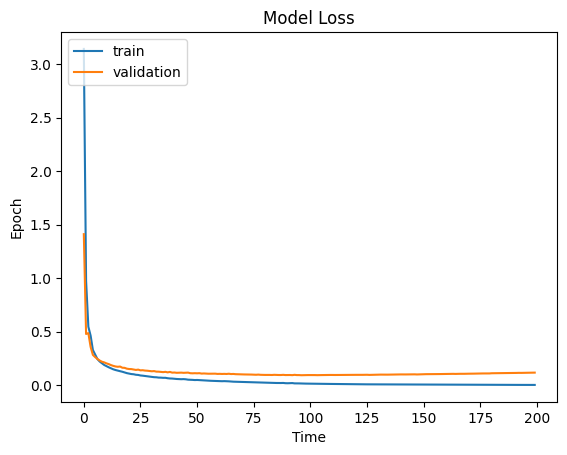

In [75]:
# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [76]:
_, acc = model_cnn.evaluate(X_test_features, y_test)
print("Test Accuracy : ", acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9760 - loss: 0.0745 
Test Accuracy :  0.9583333134651184


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


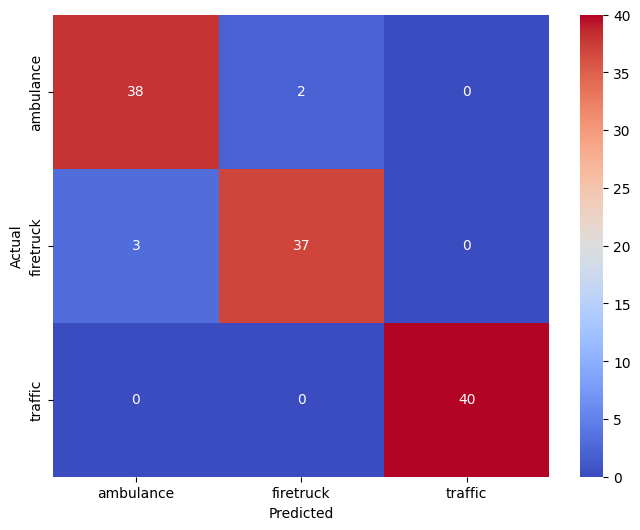

In [81]:
y_pred = model_cnn.predict(X_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [83]:
model_cnn.save('siren_CNN_Model.h5')

📍 LSTM

In [84]:
x_train_features  = X_train.reshape(len(X_train),-1, 80)
x_test_features = X_test.reshape(len(X_test), -1, 80)
print("Reshaped Array Size", x_train_features.shape)

Reshaped Array Size (480, 1, 80)


In [85]:
def lstm(x_tr):
    K.clear_session()
    inputs = Input(shape=(x_tr.shape[1], x_tr.shape[2]))
    #lstm
    x = LSTM(128)(inputs)
    x = Dropout(0.5)(x)
    #dense
    x = Dense(64, activation='relu')(x)
    x = Dense(y_test.shape[1], activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [86]:
model_lstm = lstm(x_train_features)
model_lstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       107,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,459 (451.01 KB)

 Trainable params: 115,459 (451.01 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [92]:
history = model_lstm.fit(x_train_features, y_train, epochs = 1000,
                        callbacks = [mc],
                        batch_size = 64, validation_data = (x_test_features, y_test))

Epoch 1/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - acc: 0.2188 - loss: 0.7933
Epoch 1: val_acc improved from -inf to 0.81667, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.2899 - loss: 0.7256 - val_acc: 0.8167 - val_loss: 0.5395
Epoch 2/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.7500 - loss: 0.5664
Epoch 2: val_acc improved from 0.81667 to 0.88333, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7782 - loss: 0.5311 - val_acc: 0.8833 - val_loss: 0.4387
Epoch 3/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.9062 - loss: 0.4333
Epoch 3: val_acc did not improve from 0.88333
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8639 - loss: 0.4376 - val_acc: 0.8833 - val_loss: 0.3450
Epoch 4/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.8438 - loss: 0.3874
Epoch 4: val_acc improved from 0.88333 to 0.89167, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8949 - loss: 0.3402 - val_acc

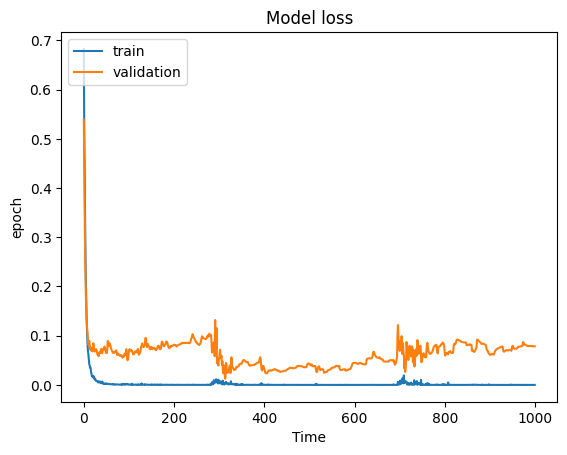

In [93]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Time')
plt.ylabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [94]:
_,acc = model_lstm.evaluate(x_test_features, y_test)
print("Accuracy:", acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9879 - loss: 0.0388     
Accuracy: 0.9750000238418579


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


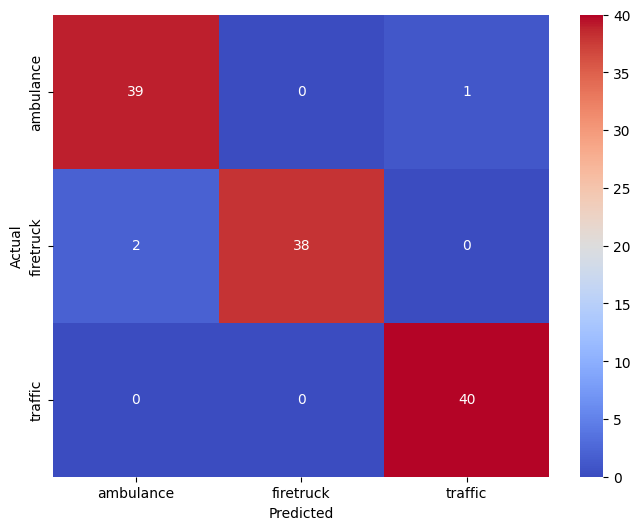

In [96]:
y_pred = model_lstm.predict(x_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [1]:
model_lstm.save('siren_LSTM.h5')

NameError: name 'model_lstm' is not defined

In [ ]:
# Ask the user for the path to the audio file
audio_file_path = input("Enter the path to the audio file: ")

# Load the audio file and extract the features
audio, sample_rate = librosa.load(audio_file_path)
features = features_extractor(audio_file_path)
reshaped_features = features.reshape(1, -1, 80)

# Load the trained model
model = load_model('siren_CNN_Model.h5')  # Replace with the path to the saved model file

# Predict the class of the input audio file
prediction = model.predict(reshaped_features)
predicted_class = labelencoder.inverse_transform(np.argmax(prediction))

# Display the predicted class
print("Predicted class:", predicted_class)